In [32]:
import pandas as pd
import numpy as np

from scipy import stats
from IPython.display import display, Markdown
from datetime import date, datetime as dt

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns

mpl.style.use('seaborn-muted')
sns.set(style="whitegrid")

In [3]:
pd.options.display.max_rows = 200

In [4]:
def load_ts_df(path):
    df = pd.read_json(path, lines=True)
    df['date'] = df[['year', 'month', 'day']].apply(lambda x: date(*x), axis=1)
    return df.sort_values('date')

In [5]:
def plot_ts(df, y='count', w=15, h=3):
    plt.figure(figsize=(w,h))
    plt.bar(list(df.date), df[y], linewidth=0, width=1)
    plt.show()

In [6]:
links = load_ts_df('data/domain-link-ts-counts.json/part-00000-fd8939b8-5608-4582-b944-ff69225f8912-c000.json')

In [8]:
articles = load_ts_df('data/domain-article-ts-counts.json/part-00000-52b127cd-f723-4a0a-b146-35159f7bccce-c000.json')

In [9]:
link_counts = pd.read_json('data/domain-link-counts.json/part-00000-d73512e3-ea00-4314-a7b9-10ddcd09b8b2-c000.json', lines=True)

# Links per article

In [13]:
links_articles = links.merge(articles, on=('domain', 'date'), suffixes=('_links', '_articles'))

In [14]:
links_articles['links_per_article'] = links_articles.count_links / links_articles.count_articles

In [16]:
links_articles.head(10)

,count_links,day_links,domain,month_links,year_links,date,count_articles,day_articles,month_articles,year_articles,links_per_article
0,421,1,vox.com,1,2017,2017-01-01,100,1,1,2017,4.210000
1,93,1,fortune.com,1,2017,2017-01-01,53,1,1,2017,1.754717
2,718,1,theintercept.com,1,2017,2017-01-01,69,1,1,2017,10.405797
3,7611,1,theguardian.com,1,2017,2017-01-01,1300,1,1,2017,5.854615
4,482,1,theblaze.com,1,2017,2017-01-01,76,1,1,2017,6.342105
5,663,1,variety.com,1,2017,2017-01-01,91,1,1,2017,7.285714
6,60,1,thefederalist.com,1,2017,2017-01-01,30,1,1,2017,2.000000
7,10336,1,nytimes.com,1,2017,2017-01-01,1079,1,1,2017,9.579240
8,1434,1,apnews.com,1,2017,2017-01-01,162,1,1,2017,8.851852
9,2286,1,independent.co.uk,1,2017,2017-01-01,451,1,1,2017,5.068736


nytimes.com


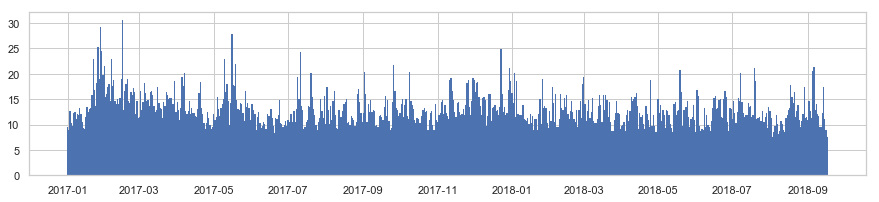

cnn.com


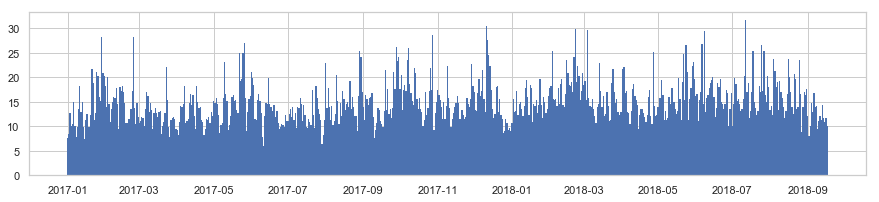

washingtonpost.com


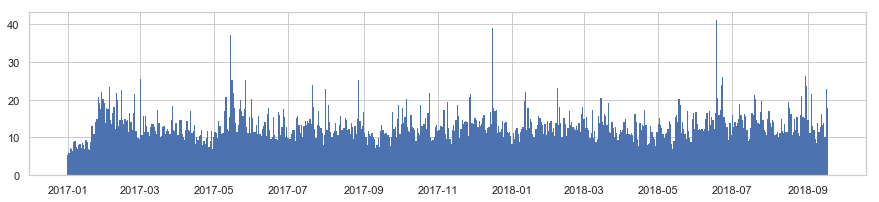

thehill.com


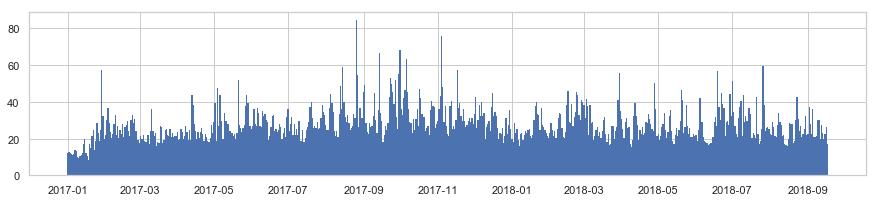

theguardian.com


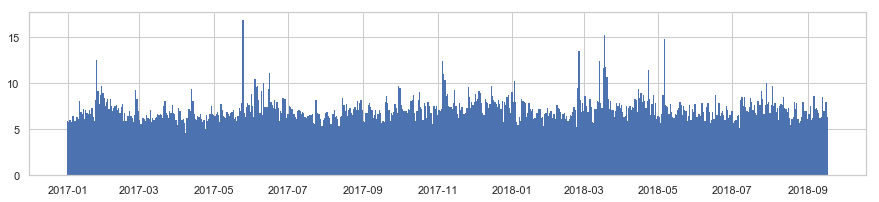

foxnews.com


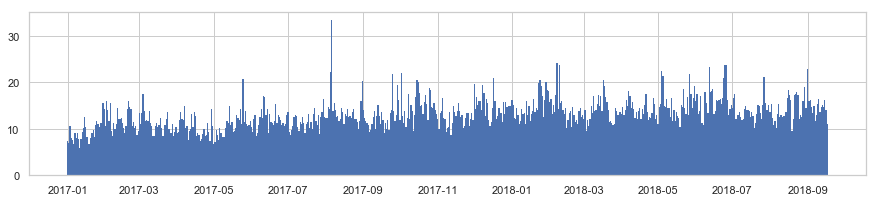

bbc.co.uk


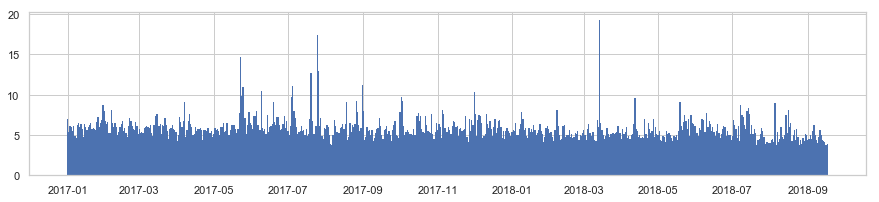

reuters.com


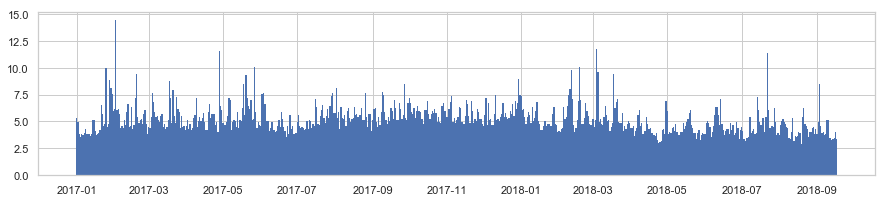

breitbart.com


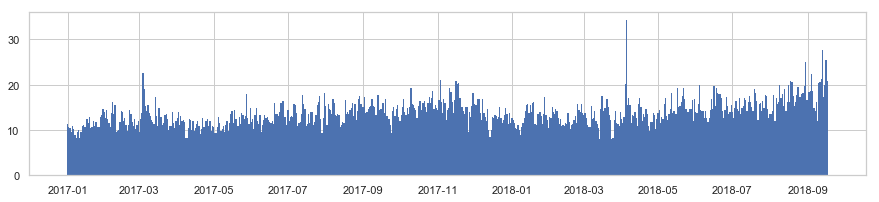

huffingtonpost.com


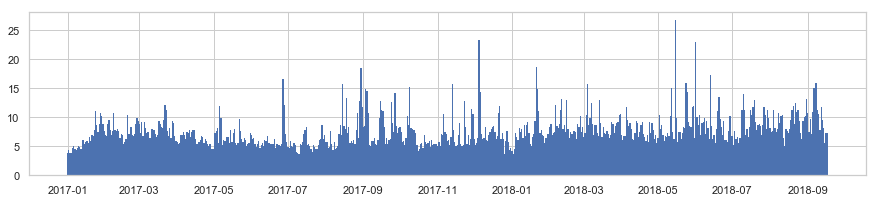

politico.com


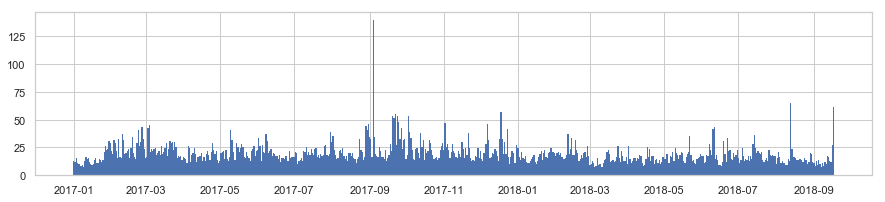

independent.co.uk


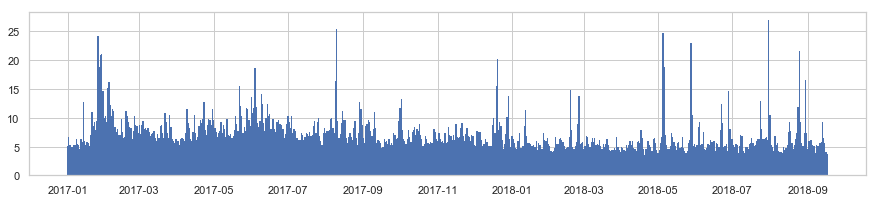

nbcnews.com


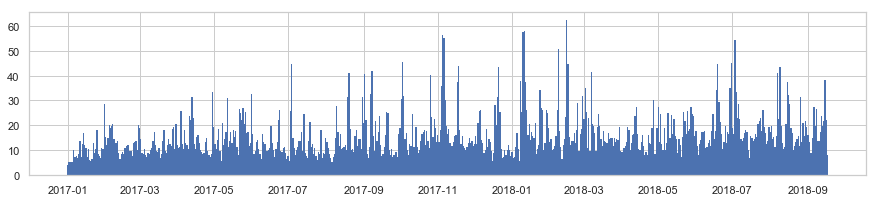

bloomberg.com


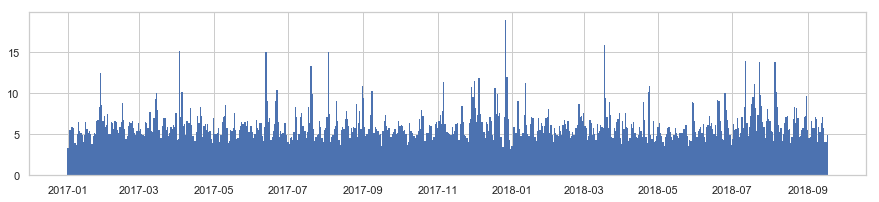

forbes.com


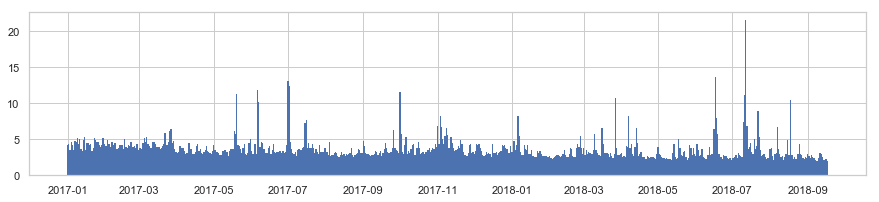

yahoo.com


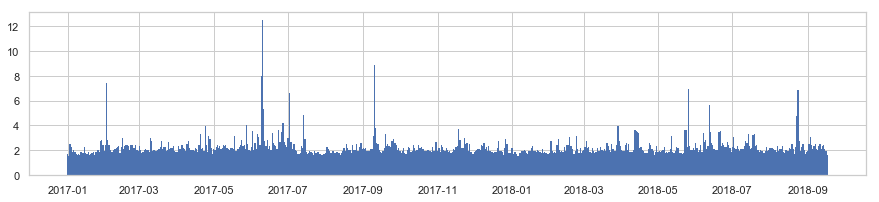

buzzfeed.com


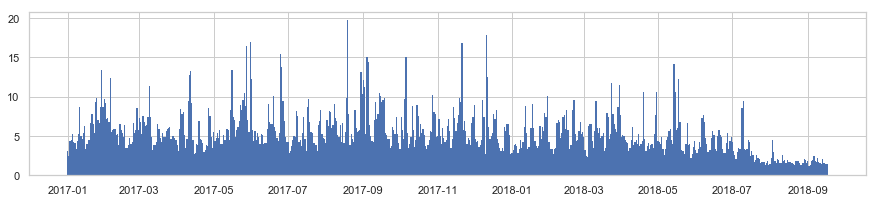

wsj.com


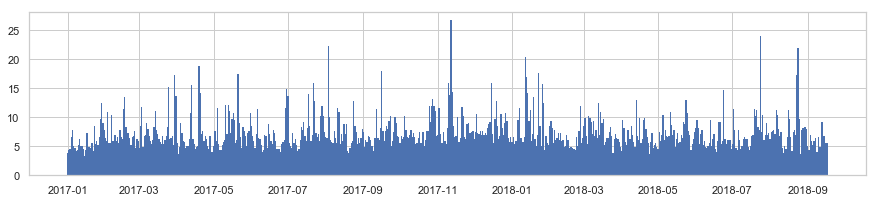

thegatewaypundit.com


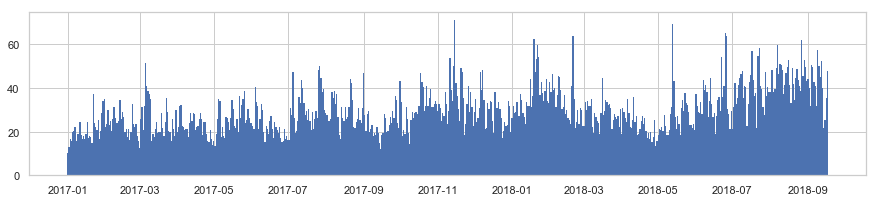

businessinsider.com


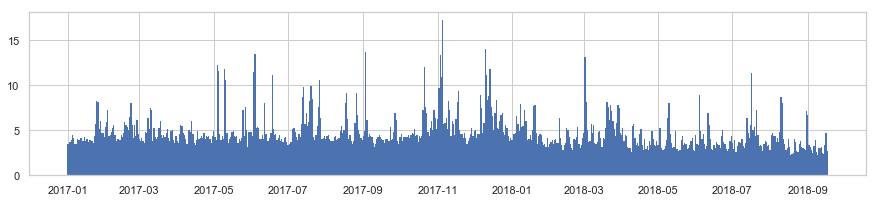

cbsnews.com


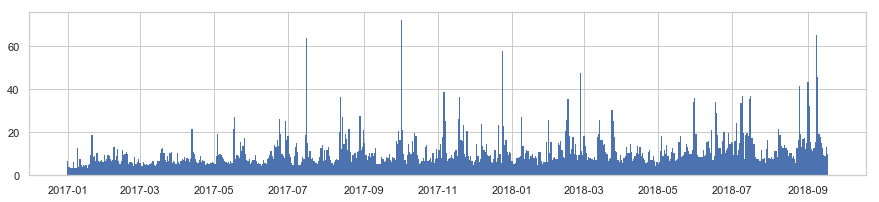

usatoday.com


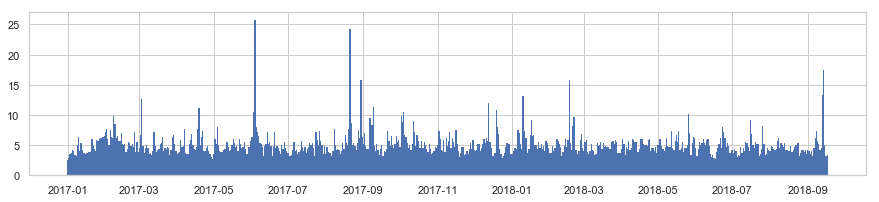

dailycaller.com


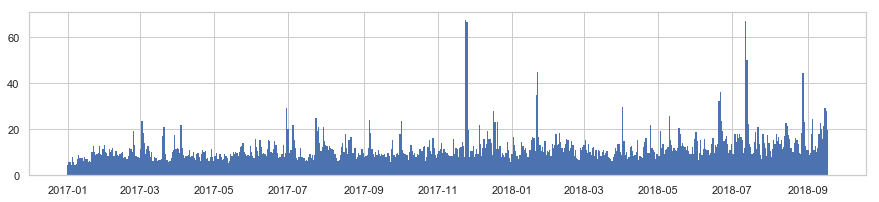

apnews.com


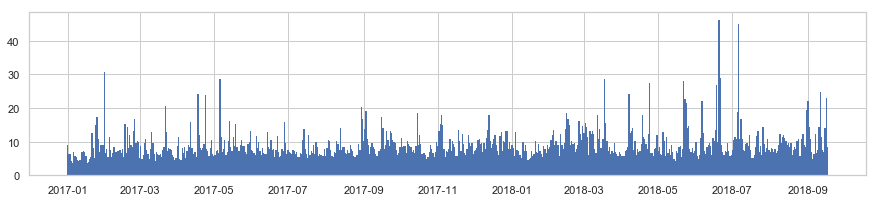

rawstory.com


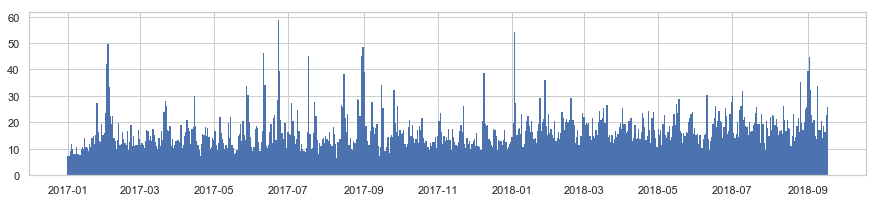

npr.org


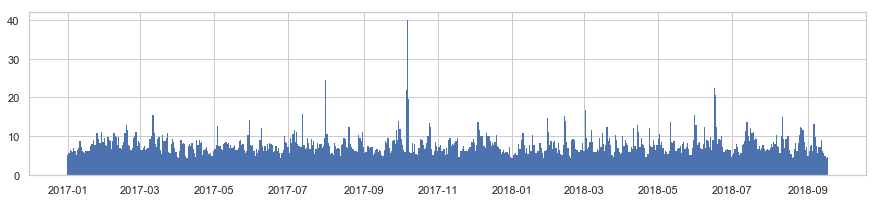

truepundit.com


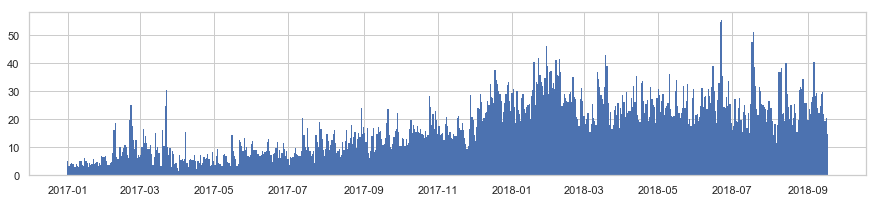

vice.com


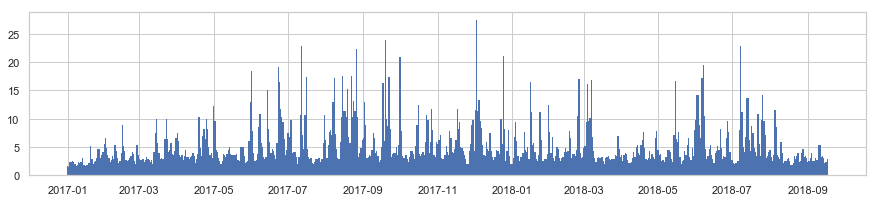

thedailybeast.com


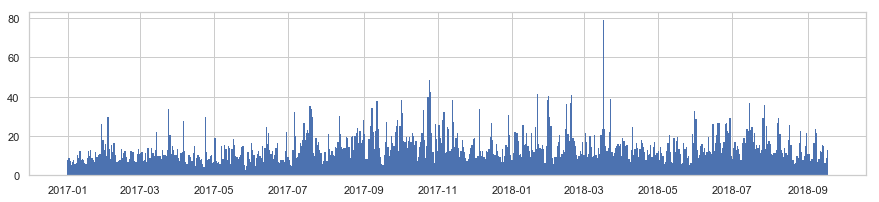

cnbc.com


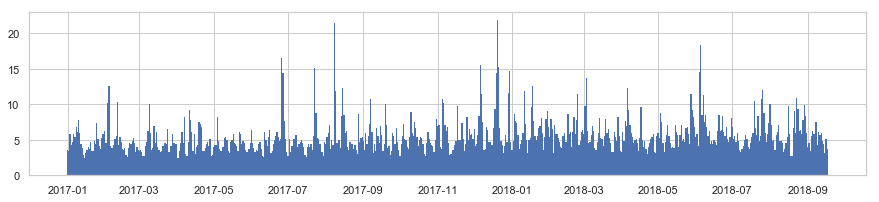

time.com


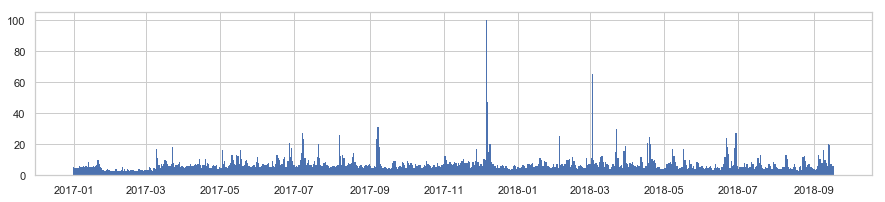

telegraph.co.uk


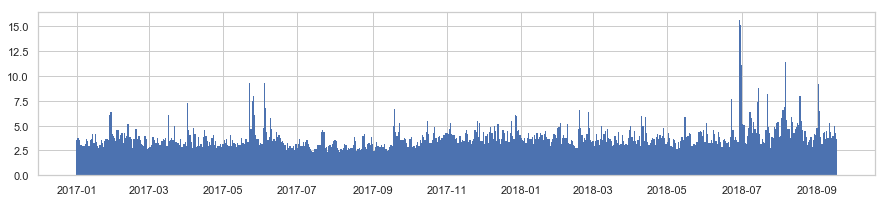

newsweek.com


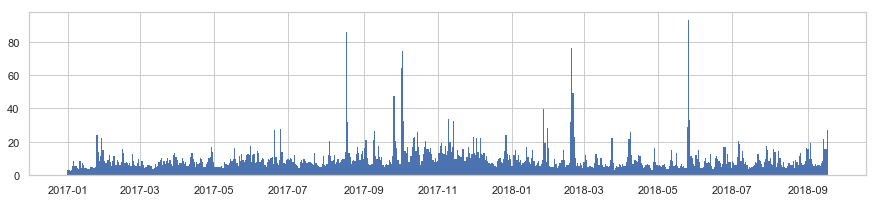

nypost.com


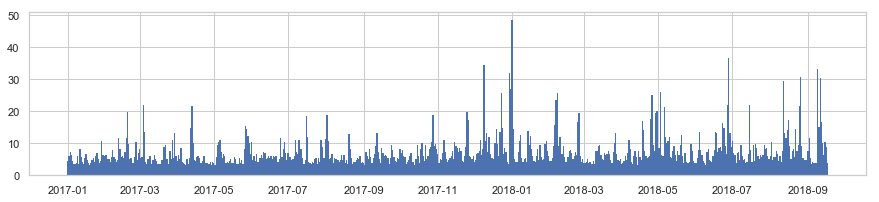

nydailynews.com


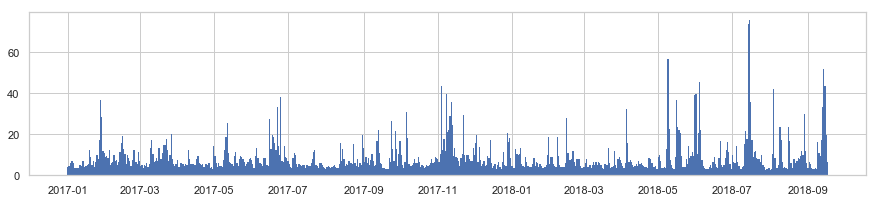

washingtonexaminer.com


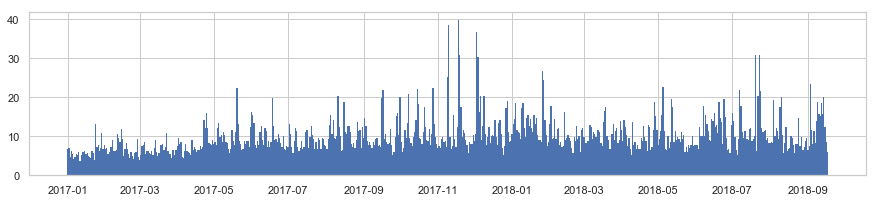

cbc.ca


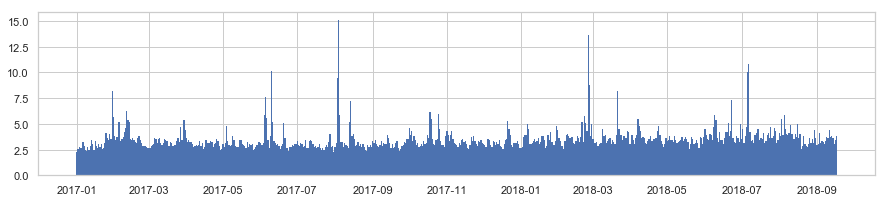

thinkprogress.org


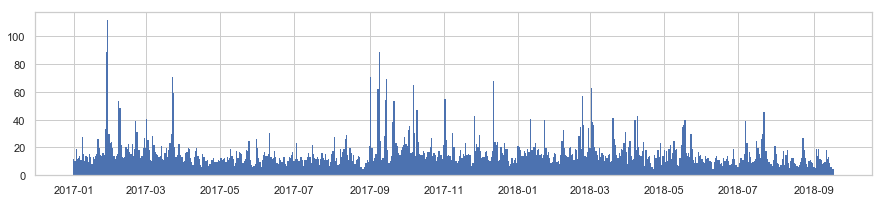

vox.com


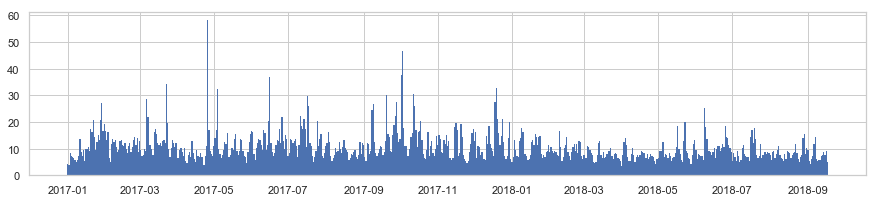

theatlantic.com


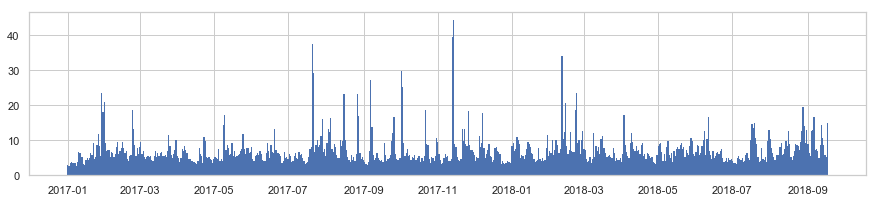

rt.com


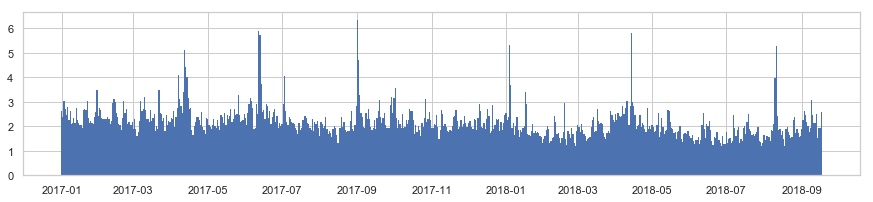

ft.com


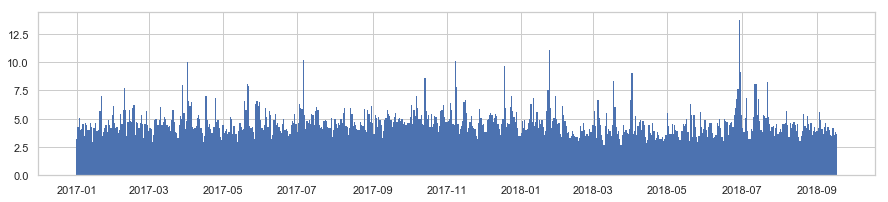

newyorker.com


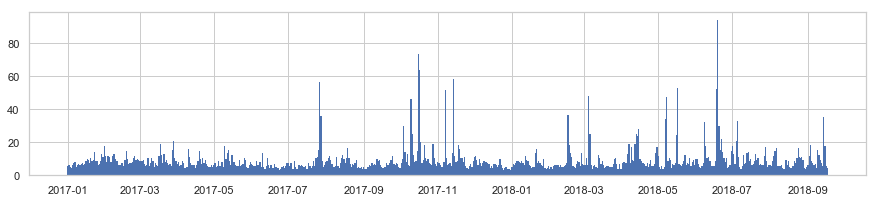

slate.com


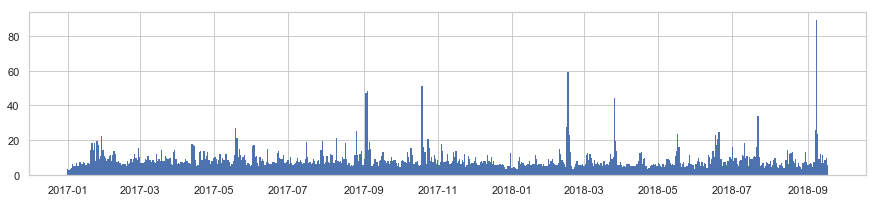

theroot.com


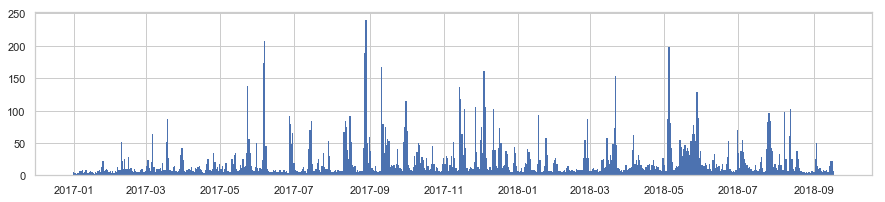

variety.com


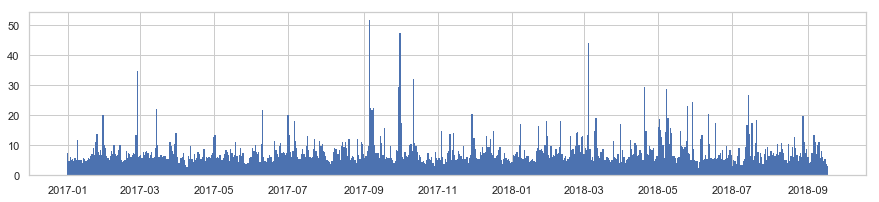

inc.com


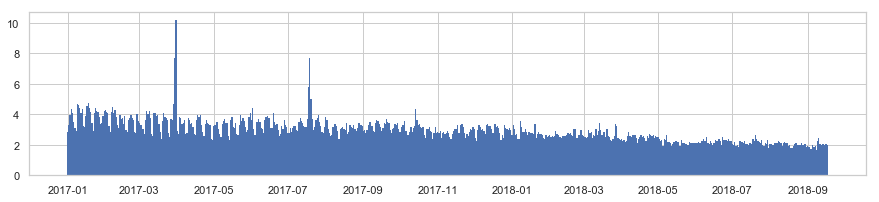

dailykos.com


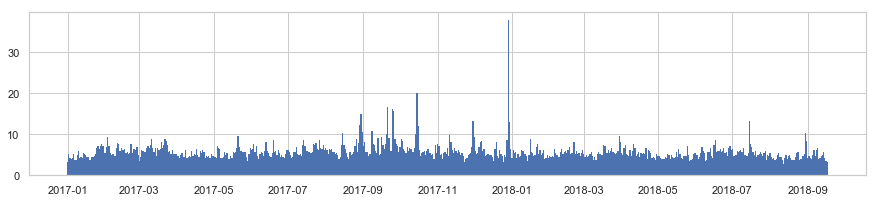

judicialwatch.org


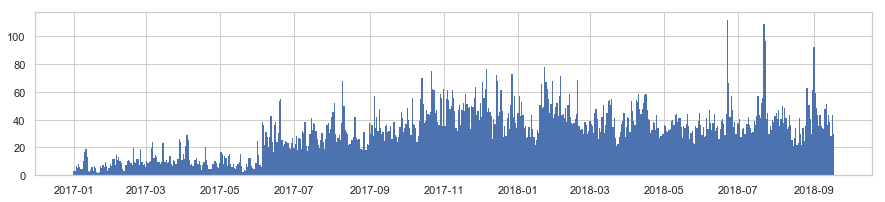

msnbc.com


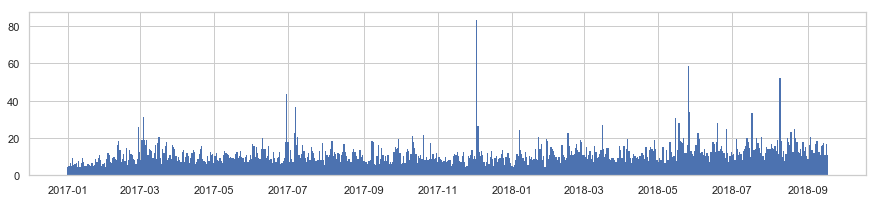

motherjones.com


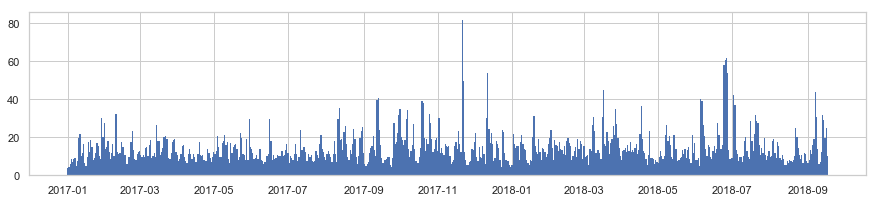

aljazeera.com


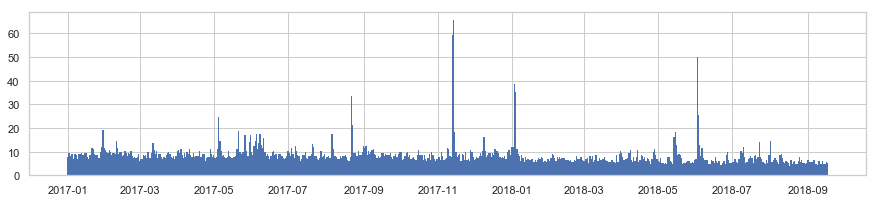

washingtontimes.com


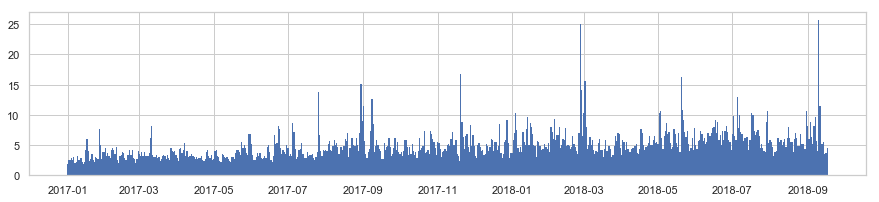

dailywire.com


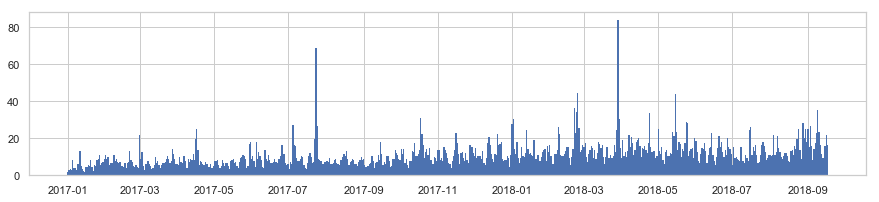

economist.com


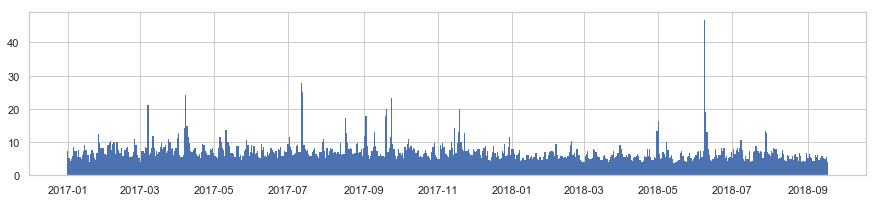

infowars.com


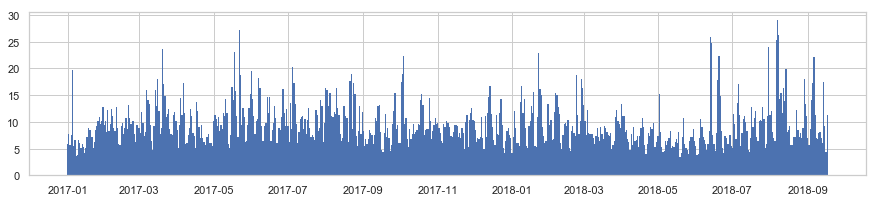

axios.com


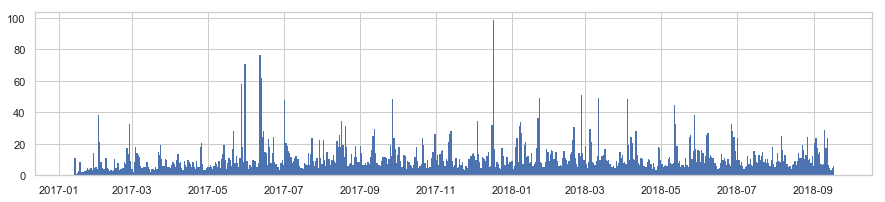

politicususa.com


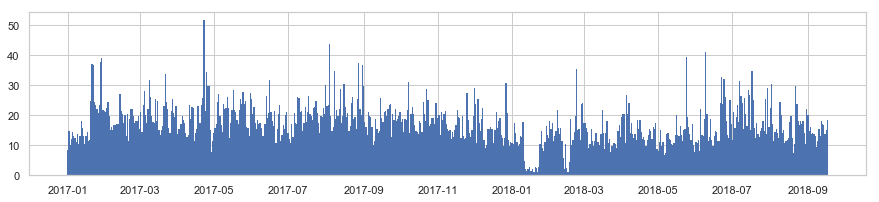

theonion.com


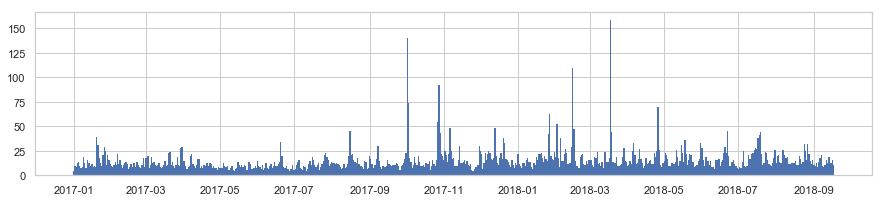

theintercept.com


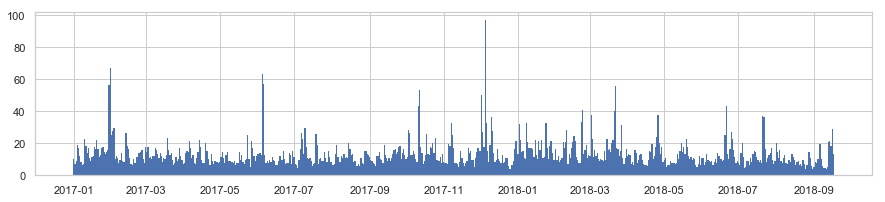

msn.com


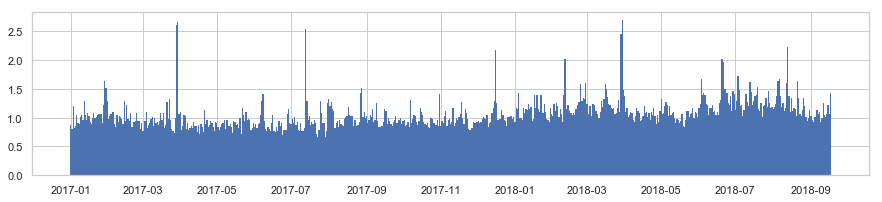

thetimes.co.uk


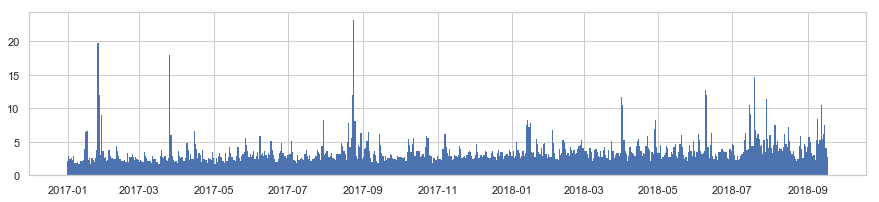

nymag.com


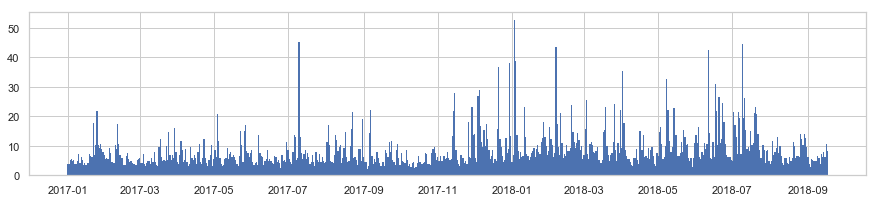

salon.com


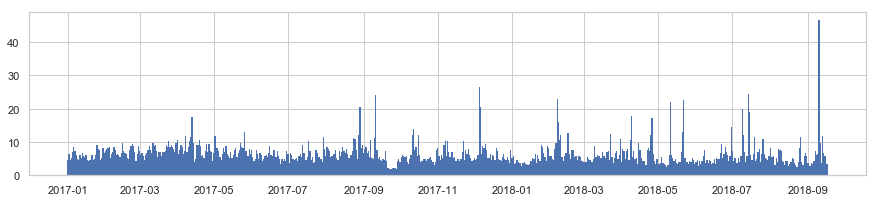

qz.com


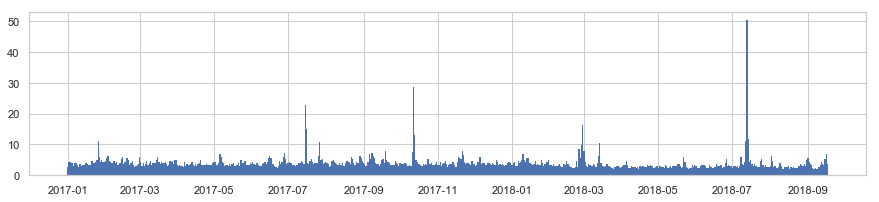

nationalreview.com


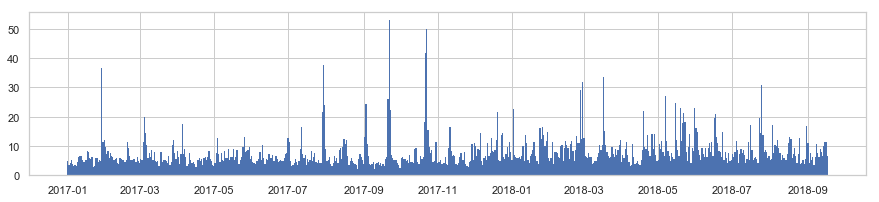

palmerreport.com


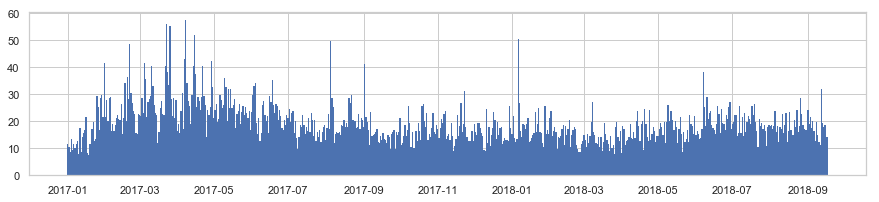

townhall.com


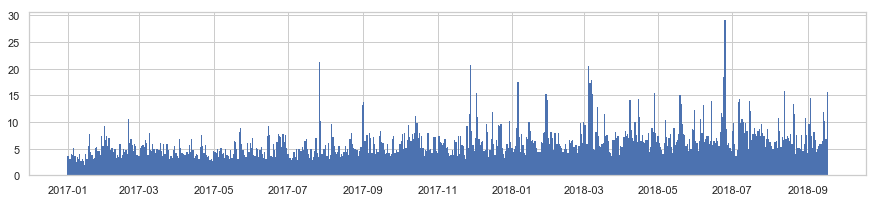

thefederalist.com


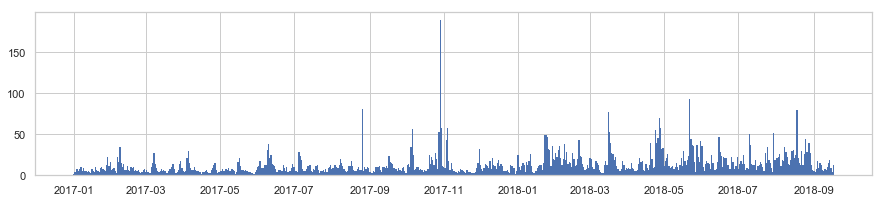

hbr.org


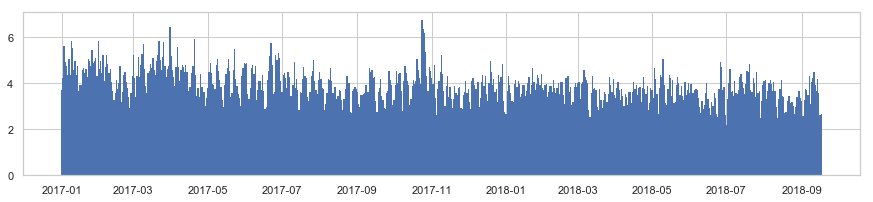

hannity.com


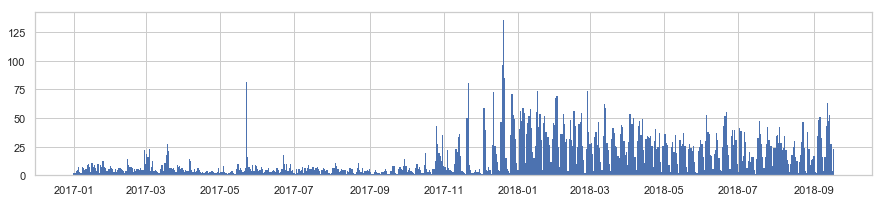

talkingpointsmemo.com


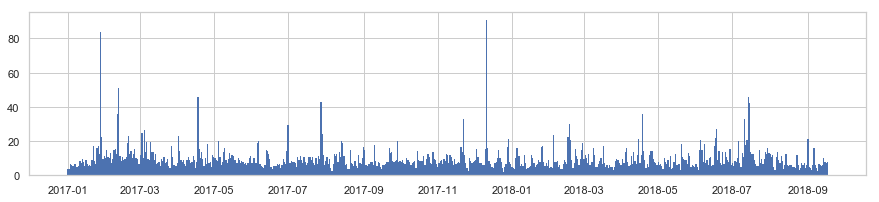

sputniknews.com


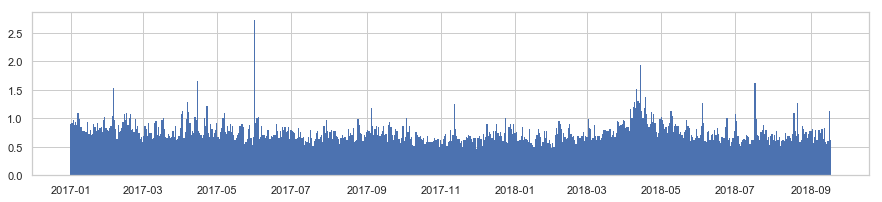

fortune.com


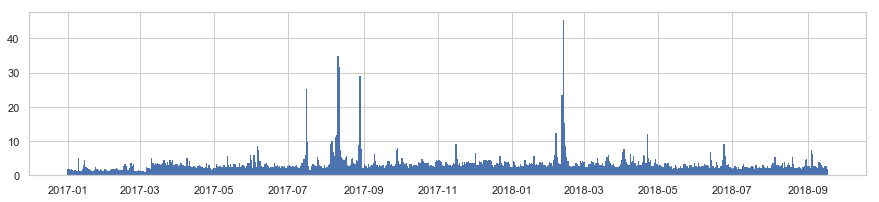

thenation.com


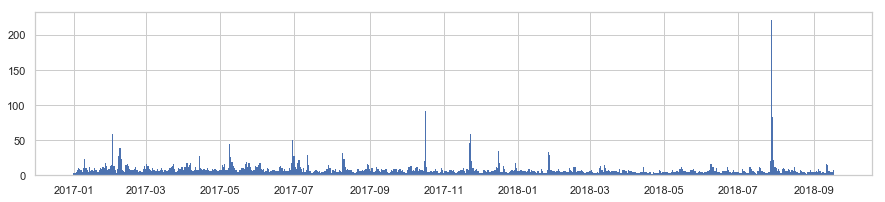

foreignpolicy.com


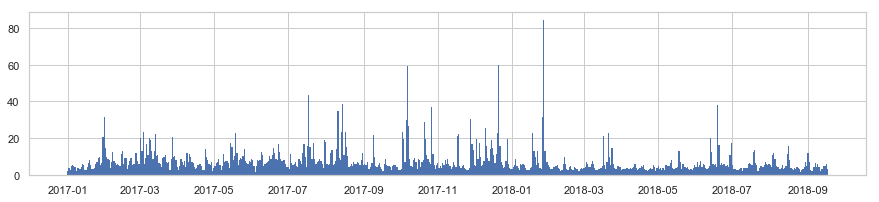

theblaze.com


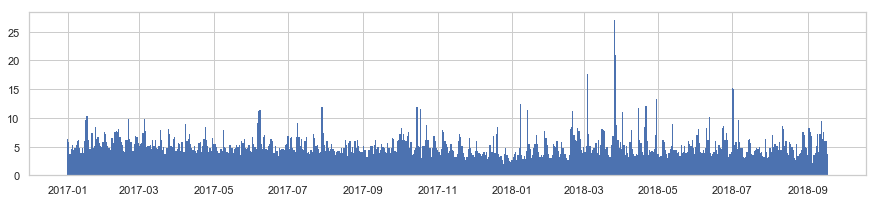

propublica.org


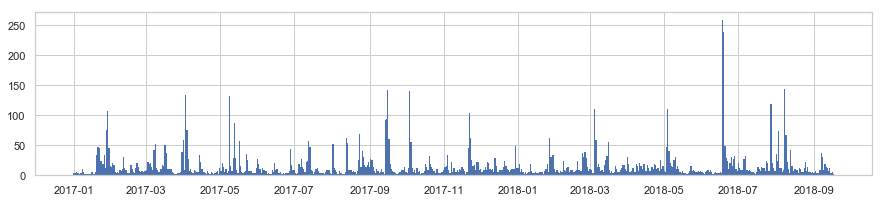

pbs.org


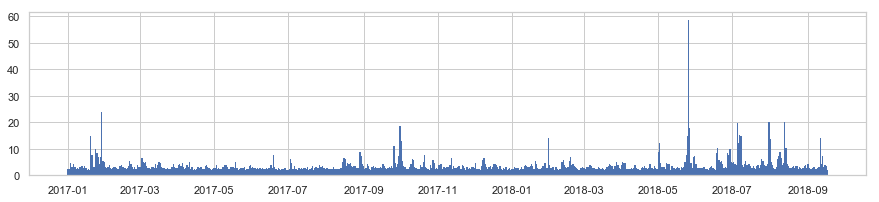

foxbusiness.com


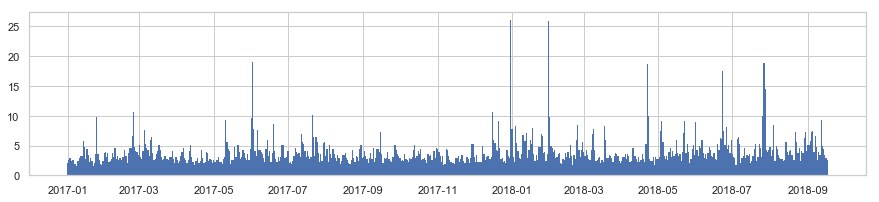

conservativereview.com


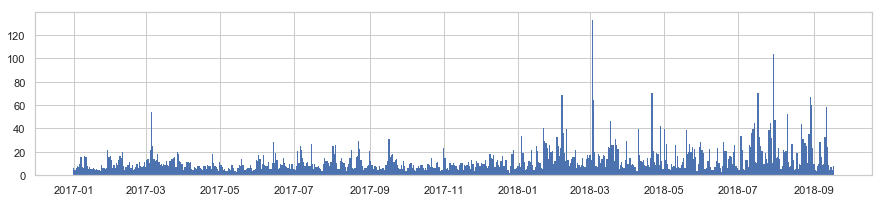

theconversation.com


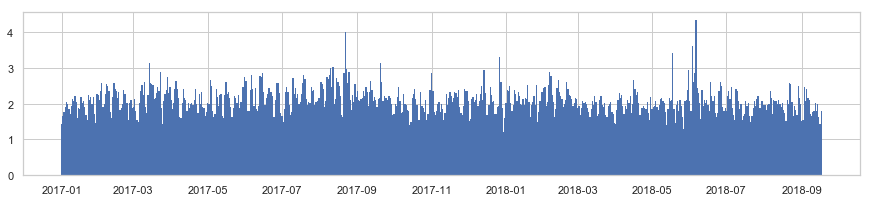

fivethirtyeight.com


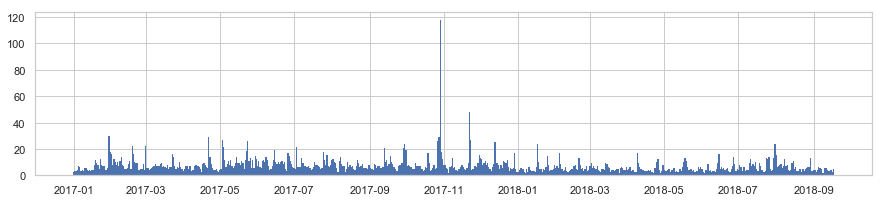

crooksandliars.com


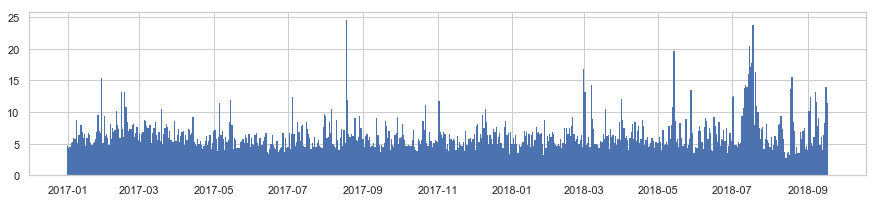

jezebel.com


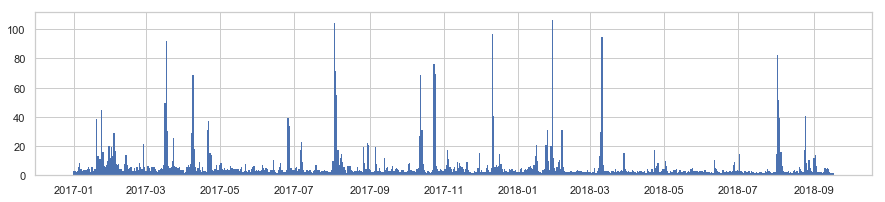

newrepublic.com


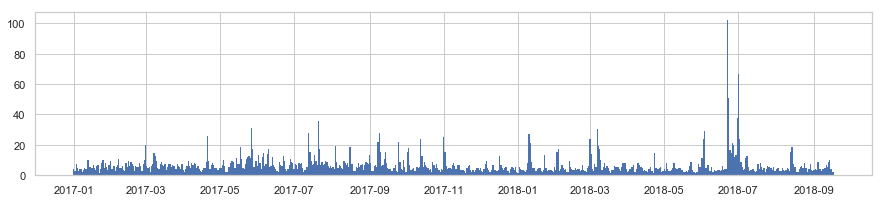

realclearpolitics.com


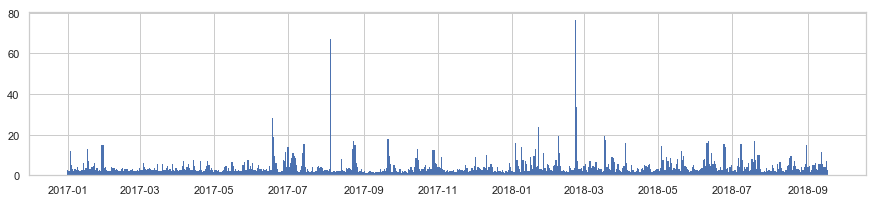

In [17]:
for d in link_counts.domain:
    print(d)
    plot_ts(links_articles[links_articles.domain==d], 'links_per_article')

In [45]:
def lpa_linreg_xy(domain):
    
    ddf = links_articles[links_articles.domain==domain]
    
    days = sorted(links_articles.date.unique())
    day_lpa = {r.date: r.links_per_article for r in ddf.itertuples()}
    y = np.array([day_lpa.get(d, 0) for d in days])
    
    x = list(range(len(y)))
    y = y / y.sum()
    
    return x, y

In [46]:
rows = []
for d in links_articles.domain.unique():
    x, y = lpa_linreg_xy(d)
    lr = stats.linregress(x, y)
    rows.append((d, lr.slope, lr.pvalue))

In [55]:
lr_df = pd.DataFrame(rows, columns=('domain', 'slope', 'p'))
lr_df.sort_values('slope', ascending=False, inplace=True)

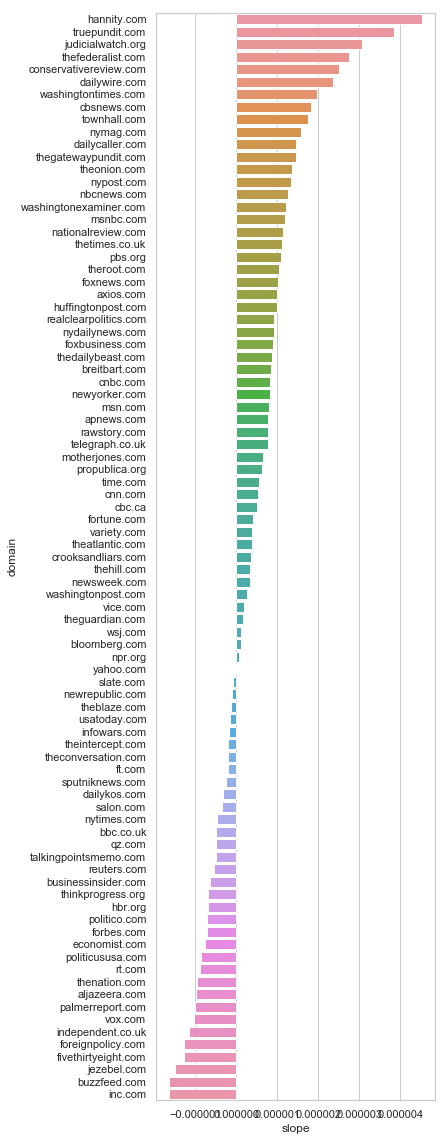

In [57]:
plt.figure(figsize=(5,20))
sns.barplot(x='slope', y='domain', data=lr_df)

# Most increasing

In [56]:
lr_df.head(10)

,domain,slope,p
65,hannity.com,0.000005,1.678277e-37
63,truepundit.com,0.000004,7.654728e-122
70,judicialwatch.org,0.000003,2.586499e-73
6,thefederalist.com,0.000003,3.617941e-15
24,conservativereview.com,0.000003,3.007696e-16
69,dailywire.com,0.000002,1.444440e-29
62,washingtontimes.com,0.000002,2.245618e-35
44,cbsnews.com,0.000002,2.399764e-14
15,townhall.com,0.000002,2.395576e-28
73,nymag.com,0.000002,7.704348e-10


hannity.com 4.532927556458221e-06 1.6782772455076056e-37


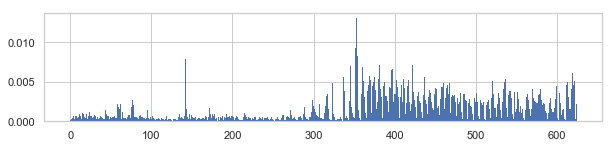

truepundit.com 3.847699201176366e-06 7.654728086329114e-122


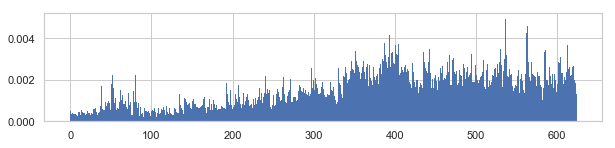

judicialwatch.org 3.0694024268872623e-06 2.5864993965681628e-73


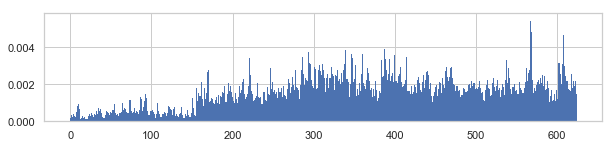

thefederalist.com 2.747475843903554e-06 3.6179405757208876e-15


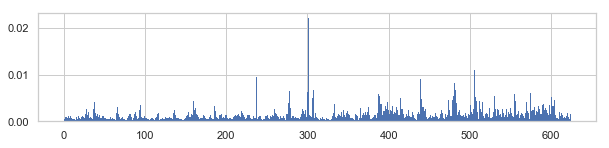

conservativereview.com 2.511025863331065e-06 3.0076964582304735e-16


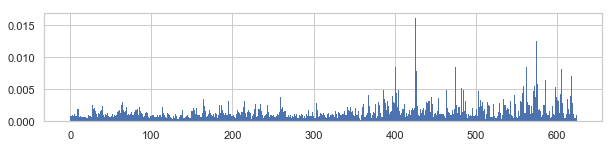

dailywire.com 2.3463527367079202e-06 1.4444396582725384e-29


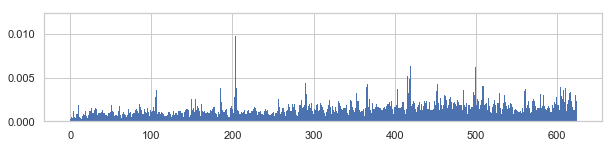

washingtontimes.com 1.971627813961545e-06 2.2456180503291993e-35


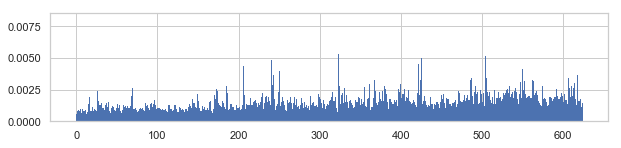

cbsnews.com 1.8280425245233844e-06 2.3997637265910627e-14


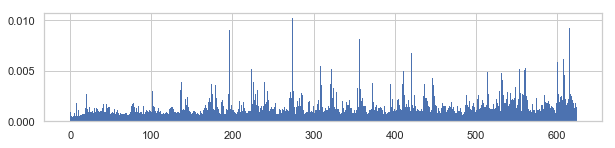

townhall.com 1.7436027160336956e-06 2.395576033735299e-28


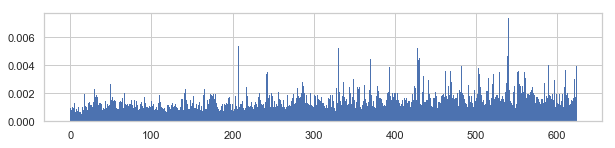

nymag.com 1.568349913503678e-06 7.704347615761639e-10


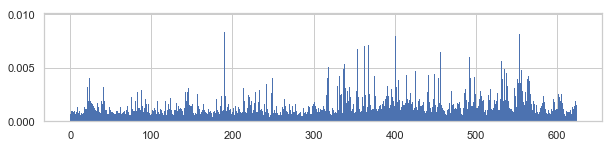

In [65]:
for r in lr_df.head(10).itertuples():
    x, y = lpa_linreg_xy(r.domain)
    print(r.domain, r.slope, r.p)
    plt.figure(figsize=(10,2))
    plt.bar(x, y, linewidth=0, width=1)
    plt.show()

# Most decreasing

In [68]:
lr_df.sort_values('slope').head(10)

,domain,slope,p
20,inc.com,-1.647895e-06,5.965261e-102
38,buzzfeed.com,-1.633772e-06,3.388076e-21
74,jezebel.com,-1.501490e-06,1.595364e-02
53,fivethirtyeight.com,-1.267502e-06,4.254850e-05
36,foreignpolicy.com,-1.266770e-06,6.976459e-05
9,independent.co.uk,-1.150420e-06,2.238014e-15
0,vox.com,-1.018671e-06,1.269430e-08
47,palmerreport.com,-1.013483e-06,3.750729e-15
16,aljazeera.com,-9.876704e-07,3.869693e-07
59,thenation.com,-9.561691e-07,3.695303e-02


inc.com -1.6478953675672734e-06 5.9652608656438824e-102


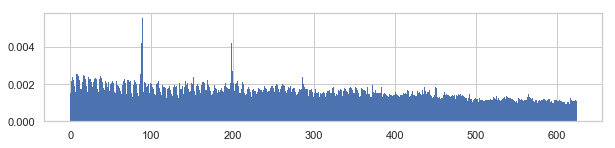

buzzfeed.com -1.6337721006170569e-06 3.388075853560455e-21


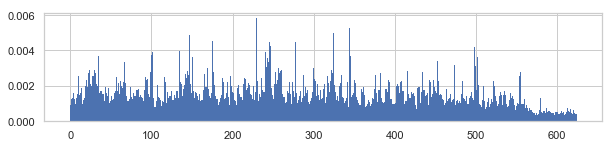

jezebel.com -1.5014895638513743e-06 0.015953638819652335


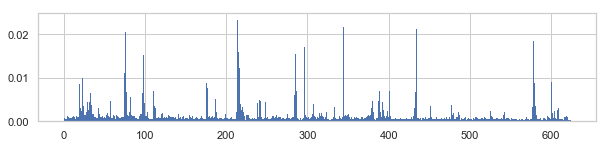

fivethirtyeight.com -1.2675023812501161e-06 4.2548497671952795e-05


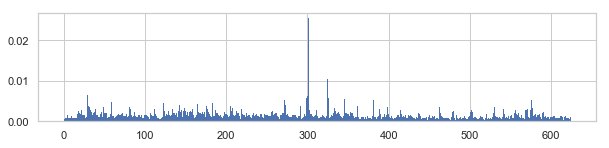

foreignpolicy.com -1.266769938353104e-06 6.97645888524385e-05


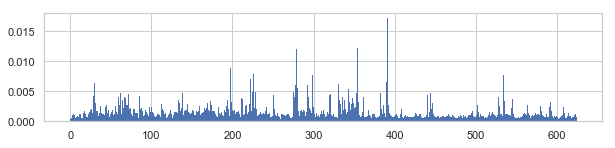

independent.co.uk -1.1504197294643135e-06 2.238013548998585e-15


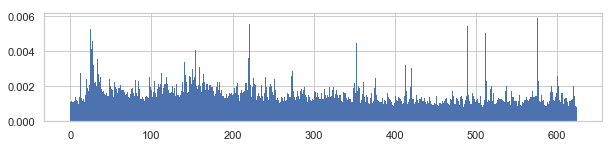

vox.com -1.018670988371252e-06 1.2694303859081663e-08


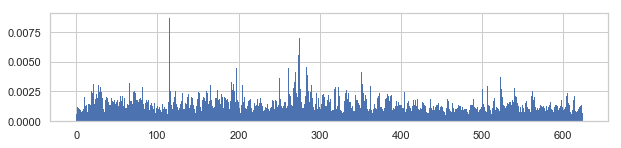

palmerreport.com -1.0134833634242737e-06 3.75072877588808e-15


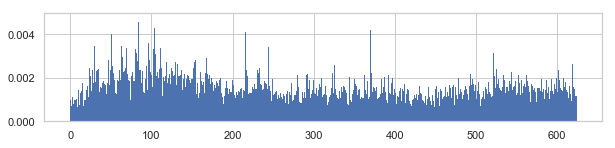

aljazeera.com -9.87670390885919e-07 3.869692531554579e-07


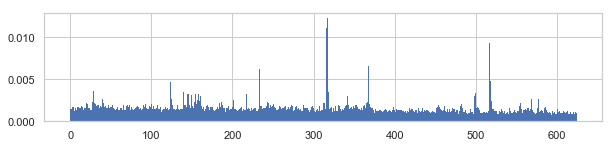

thenation.com -9.561690835905954e-07 0.036953025637384715


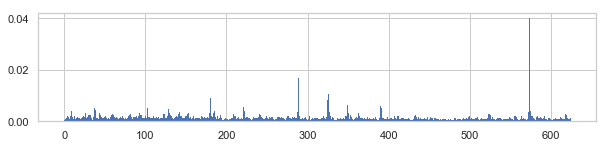

In [71]:
for r in lr_df.sort_values('slope').head(10).itertuples():
    x, y = lpa_linreg_xy(r.domain)
    print(r.domain, r.slope, r.p)
    plt.figure(figsize=(10,2))
    plt.bar(x, y, linewidth=0, width=1)
    plt.show()